In [9]:
#Partie C 

In [11]:
#Question 8

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data1 = pd.read_csv("C:/Users/guill/Downloads/data1.csv",sep=",",index_col=0);

In [4]:
data1.head()

,Temperature_minimale,Temperature_maximale,Hauteur_precipitations,Duree_ensoleillement
Ville,,,,
Ajaccio,12.3,22.5,515.8,2854.5
Bastia,12.6,22.0,921.0,2613.6
Beauvais,7.7,16.1,864.7,1430.3
Biarritz,11.5,19.2,1819.4,1812.7
Bordeaux,10.6,19.3,1016.8,1871.5


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data1)





In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
var1, var2 = pca.explained_variance_ratio_

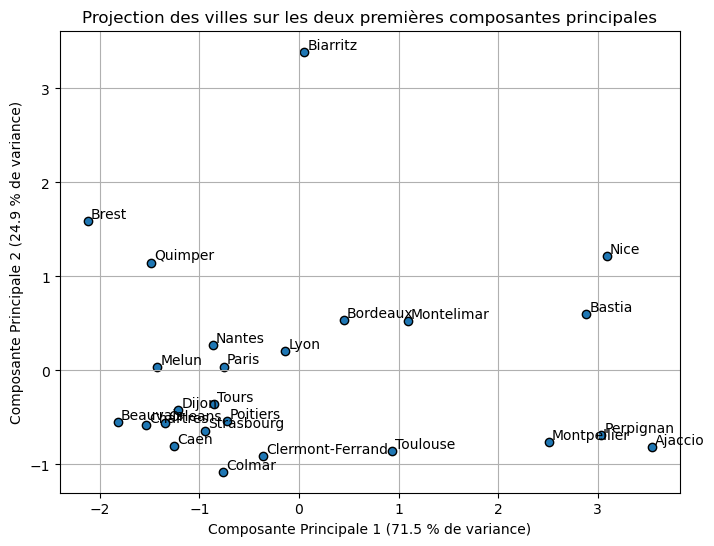

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k')
for i, city in enumerate(data1.index):
    plt.text(X_pca[i, 0] + 0.03, X_pca[i, 1] + 0.03, city)

plt.xlabel(f'Composante Principale 1 ({var1*100:.1f} % de variance)')
plt.ylabel(f'Composante Principale 2 ({var2*100:.1f} % de variance)')
plt.title('Projection des villes sur les deux premières composantes principales')
plt.grid(True)
plt.show()

In [8]:
#Question 9

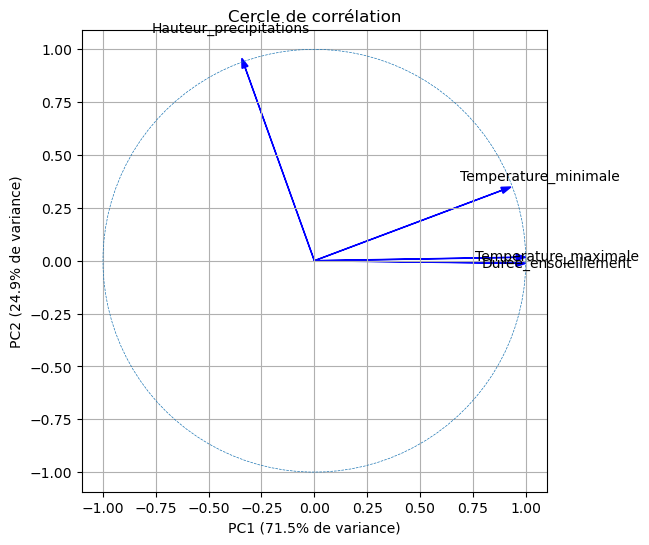

In [23]:

nlignes, ncol = data1.shape
vpropres = pca.explained_variance_
sqrt_vpropres = np.sqrt(vpropres)
corvar = np.zeros((ncol, pca.n_components_))

for k in range(pca.n_components_):
    corvar[:, k] = pca.components_[k, :] * sqrt_vpropres[k]

fig, ax = plt.subplots(figsize=(6,6))
an = np.linspace(0, 2 * np.pi, 100)
ax.plot(np.cos(an), np.sin(an), '--', linewidth=0.5)

for i in range(corvar.shape[0]):
    ax.arrow(0, 0,corvar[i, 0],corvar[i, 1],head_width=0.03,length_includes_head=True,color='b')
    ax.text(corvar[i, 0] * 1.15,corvar[i, 1] * 1.15,data1.columns[i],ha='center',va='center')


ax.set_xlabel(f"PC1 ({var1*100:.1f}% de variance)")
ax.set_ylabel(f"PC2 ({var2*100:.1f}% de variance)")
ax.set_title('Cercle de corrélation')
plt.grid(True)
ax.axis('equal')
plt.show()


In [24]:
# En regardant ce cercle, on peut en déduire que toutes les variables sont très bien expliquées par ce cercle puisqu'elles ont toutes un longueur proche de 1.
# En observant les angles entre les flèches, on peut en déduire que la températuremaximale et la durée d'ensoleillement sont presue colinéaireset donc extrèmement corrélée
# La température minimale a elle aussi une très forte composante en PC1
# Les précipitations en revanche sont plus vers PC2 et sont peu corellées avec les températures maximales mais un peu plus avec les minimales.

In [25]:
# Question 10

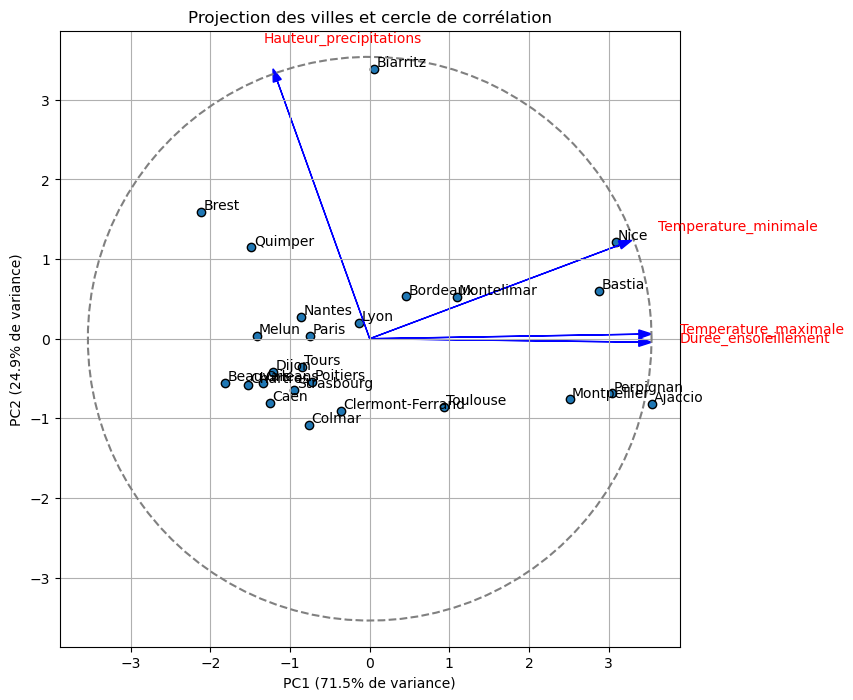

In [26]:

vpropres = pca.explained_variance_
sqrt_vpropres = np.sqrt(vpropres)
corvar = np.zeros((data1.shape[1], pca.n_components_))
for k in range(pca.n_components_):
    corvar[:, k] = pca.components_[k, :] * sqrt_vpropres[k]


factor = np.max(np.abs(X_pca))

plt.figure(figsize=(8, 8))

plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k')
for i, city in enumerate(data1.index):
    plt.text(X_pca[i, 0] + 0.03, X_pca[i, 1] + 0.03, city)


cer = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(cer) * factor, np.sin(cer) * factor, '--', color='grey')

for i, var in enumerate(data1.columns):
    x, y = corvar[i, 0] * factor, corvar[i, 1] * factor
    plt.arrow(0, 0, x, y, head_width=0.03*factor, length_includes_head=True, color='b')
    plt.text(x * 1.1, y * 1.1, var, color='r')

plt.xlabel(f'PC1 ({var1*100:.1f}% de variance)')
plt.ylabel(f'PC2 ({var2*100:.1f}% de variance)')
plt.title('Projection des villes et cercle de corrélation')
plt.grid(True)
plt.axis('equal')
plt.show()
